In [1]:
import numpy as np
import pandas as pd

from scipy import stats
import statsmodels.api as sm
from sqlalchemy import create_engine

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'lifeexpectancy'
table_name = 'lifeexpectancy'
conn_str = f"postgresql://{postgres_user}:{postgres_pw}@{postgres_host}:{postgres_port}/{postgres_db}"
        
query = """
SELECT *
FROM lifeexpectancy
"""

In [2]:
life_expectancy = pd.read_sql_query(query, con=conn_str)
life_expectancy

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [3]:
life_expectancy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [4]:
life_expectancy.isna().mean()

#can fill in the missing values with mean() or mode() for columns where NAs are <5 and others with interpolate
#after eliminating the outliers
#Missing values in Hepatitis B = 19%, big missing values in Population 22%, GDP 15%, BMI 11%
#- it's all understandable, since we have 83% of developing countries compared to 17% of developed.  

Country                            0.000000
Year                               0.000000
Status                             0.000000
Life expectancy                    0.003404
Adult Mortality                    0.003404
infant deaths                      0.000000
Alcohol                            0.066031
percentage expenditure             0.000000
Hepatitis B                        0.188223
Measles                            0.000000
 BMI                               0.011572
under-five deaths                  0.000000
Polio                              0.006467
Total expenditure                  0.076923
Diphtheria                         0.006467
 HIV/AIDS                          0.000000
GDP                                0.152485
Population                         0.221920
 thinness  1-19 years              0.011572
 thinness 5-9 years                0.011572
Income composition of resources    0.056841
Schooling                          0.055480
dtype: float64

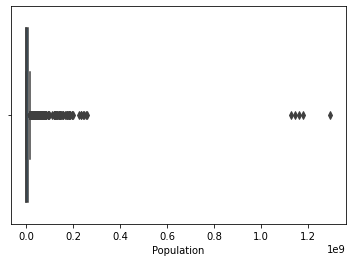

In [5]:
sns.boxplot(life_expectancy["Population"])
plt.show()

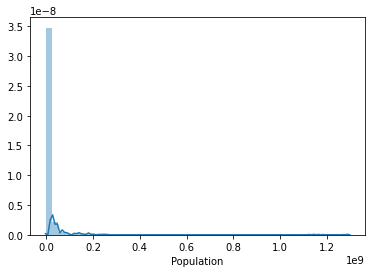

In [6]:
sns.distplot(life_expectancy["Population"])
plt.show()

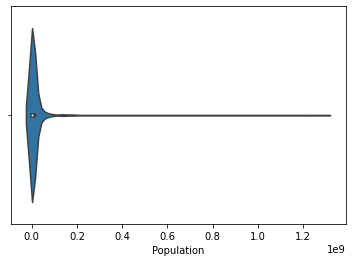

In [7]:
sns.violinplot(life_expectancy["Population"])
plt.show()

obviously see some outliers from plots presented above on Population column, let's confirm it through the Zscore below:

In [8]:
#scale the var so that its mean is 0 and std is 1. then measure how far a value is far away from the mean(0) in terms of std(1)
#the bigger the Zscore the father is from the mean = outlier. 
#here i see 3, 4 are outliers probably, so i can drop them
#Formula for Zscore = (Observation-Mean)/STD
#z = (X - u) / o

from scipy.stats import zscore

z_scores = zscore(life_expectancy["Population"])
for threshold in range(1,5):
    print("The score threshold is: {}".format(threshold))
    print("The indices of the outliers:")
    print(np.where(z_scores > threshold))
    print("Number of outliers is: {}".format(len((np.where(z_scores > threshold)[0]))))

The score threshold is: 1
The indices of the outliers:
(array([], dtype=int32),)
Number of outliers is: 0
The score threshold is: 2
The indices of the outliers:
(array([], dtype=int32),)
Number of outliers is: 0
The score threshold is: 3
The indices of the outliers:
(array([], dtype=int32),)
Number of outliers is: 0
The score threshold is: 4
The indices of the outliers:
(array([], dtype=int32),)
Number of outliers is: 0


In [9]:
life_expectancy["Population"] = life_expectancy["Population"].interpolate()


In [10]:
life_expectancy["Schooling"] = life_expectancy["Schooling"].interpolate()
life_expectancy["Total expenditure"] = life_expectancy["Total expenditure"].interpolate()
life_expectancy["GDP"] = life_expectancy["GDP"].interpolate()


In [11]:
life_expectancy["Hepatitis B"] = life_expectancy["Hepatitis B"].mean()
life_expectancy["Alcohol"] = life_expectancy["Alcohol"].mean()
life_expectancy["Income composition of resources"] = life_expectancy["Income composition of resources"].interpolate()


In [12]:
life_expectancy.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2904.000000,2938.000000,2919.000000,2938.000000,2919.000000,2938.000000,2938.000000,2.938000e+03,2904.000000,2904.000000,2938.000000,2938.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,8.094046e+01,2419.592240,38.321247,42.035739,82.550188,5.940955,82.324084,1.742103,7432.027910,1.229209e+07,4.839704,4.870317,0.634458,12.076804
std,4.613841,9.523867,124.292079,117.926501,0.000000,1987.914858,1.421327e-14,11467.272489,20.044034,160.445548,23.428046,2.445751,23.716912,5.077785,13410.150286,5.471908e+07,4.420195,4.508882,0.209574,3.342316
min,2000.000000,36.300000,1.000000,0.000000,4.602861,0.000000,8.094046e+01,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,4.602861,4.685343,8.094046e+01,0.000000,19.300000,0.000000,78.000000,4.312500,78.000000,0.100000,553.618620,2.536025e+05,1.600000,1.500000,0.500000,10.200000
50%,2008.000000,72.100000,144.000000,3.000000,4.602861,64.912906,8.094046e+01,17.000000,43.500000,4.000000,93.000000,5.760000,93.000000,0.100000,2192.681084,1.576319e+06,3.300000,3.300000,0.684000,12.400000
75%,2012.000000,75.700000,228.000000,22.000000,4.602861,441.534144,8.094046e+01,360.250000,56.200000,28.000000,97.000000,7.440000,97.000000,0.800000,7183.381694,8.215738e+06,7.200000,7.200000,0.791107,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,4.602861,19479.911610,8.094046e+01,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [13]:
life_expectancy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2938 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2938 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [14]:
life_expectancy.isnull().sum()*100/life_expectancy.count()

Country                            0.000000
Year                               0.000000
Status                             0.000000
Life expectancy                    0.341530
Adult Mortality                    0.341530
infant deaths                      0.000000
Alcohol                            0.000000
percentage expenditure             0.000000
Hepatitis B                        0.000000
Measles                            0.000000
 BMI                               1.170799
under-five deaths                  0.000000
Polio                              0.650908
Total expenditure                  0.000000
Diphtheria                         0.650908
 HIV/AIDS                          0.000000
GDP                                0.000000
Population                         0.000000
 thinness  1-19 years              1.170799
 thinness 5-9 years                1.170799
Income composition of resources    0.000000
Schooling                          0.000000
dtype: float64

I'm satisfied with filled missing values now. Used interpolate() approach with time series, expecting continuity in variables that evolves over time. 

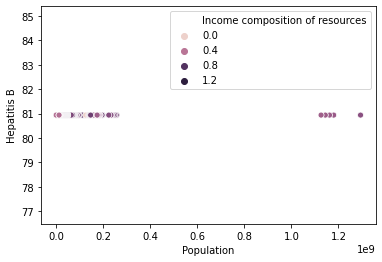

In [15]:
sns.scatterplot("Population", "Hepatitis B", 'Income composition of resources', data=life_expectancy)
plt.show()

OK, we can see from here, that income composition growth plays a big role in a population growth

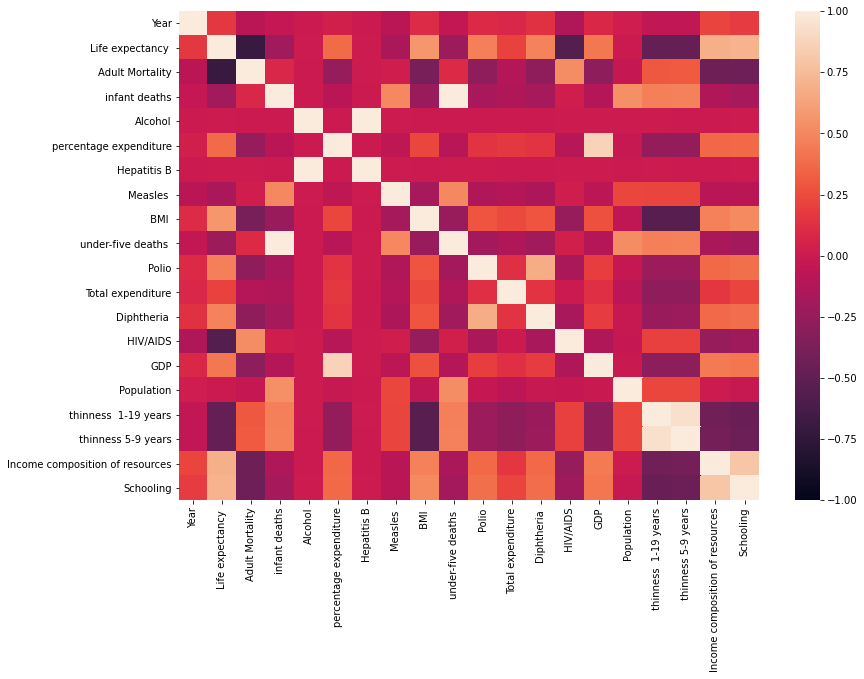

In [16]:
plt.figure(figsize=(13, 9))
sns.heatmap(life_expectancy.corr(), vmin=-1, vmax=1, annot=False)
plt.show()

Lighter colors indicate a higher correlation between variables. Wow, these stats show the strong correlations between schooling and life expectancy! I actually didn't expect it, taking into consideration that most countries in our dataset are in 'developing' category. Not many people can afford going to school there, here we see that people who get to go to school live longer! With schooling the income composition of resources is higher too. 

In [17]:
import scipy.stats as stats
from scipy.stats.mstats import winsorize

In [18]:
col_to_winsorize = life_expectancy[
    [
        "Life expectancy ",
        "Adult Mortality",
        "Alcohol",
        " BMI ",
        "infant deaths",
        "percentage expenditure",
        "Measles ",
        "under-five deaths ",
        "Income composition of resources",
        "Schooling",
    ]
]
for col in col_to_winsorize:
    life_expectancy[col] = winsorize(life_expectancy[col], (0.1, 0.1))

In [19]:
life_expect_nan = life_expectancy.drop(['Country', 'Year', 'Status'], axis=1)


In [20]:
col_to_transform = life_expect_nan.drop(
    [
        "Life expectancy ",
        "Adult Mortality",
        "Alcohol",
        " BMI ",
        "infant deaths",
        "percentage expenditure",
        "Measles ",
        "under-five deaths ",
        "Income composition of resources",
        "Schooling",
    ],
    axis=1,
)
for col in col_to_transform:
    life_expectancy[col] = np.log(life_expectancy[col])

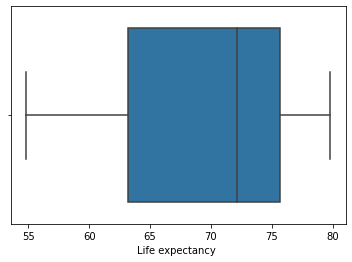

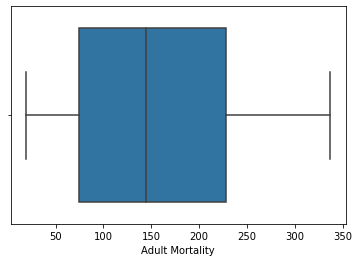

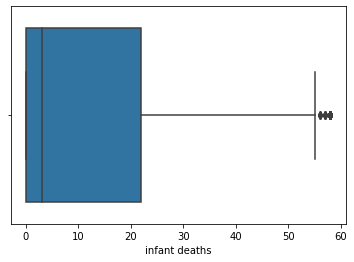

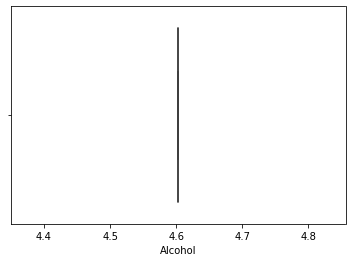

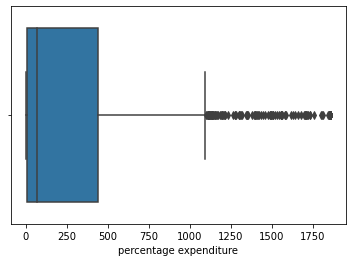

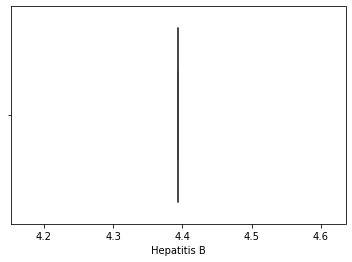

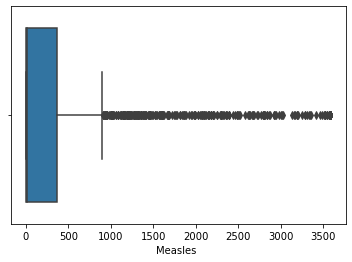

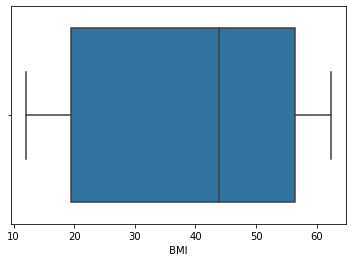

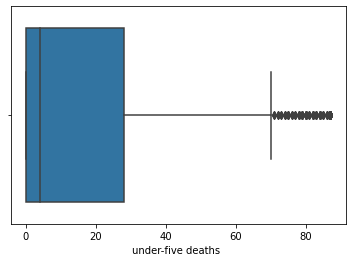

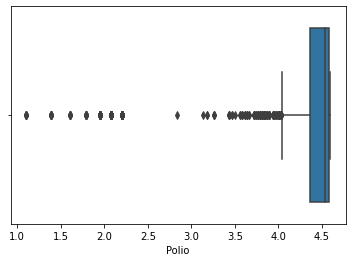

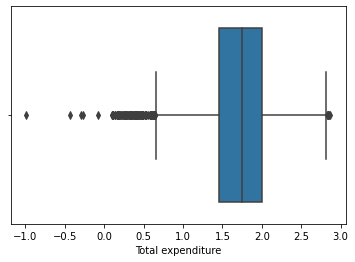

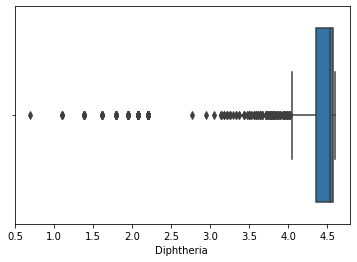

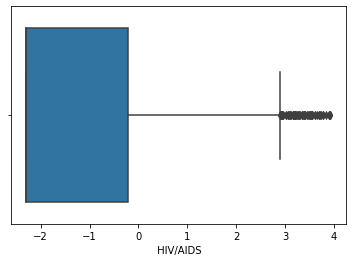

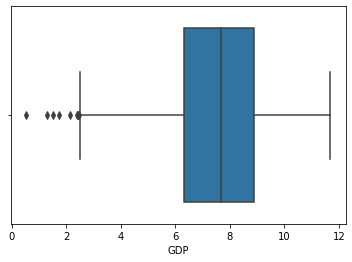

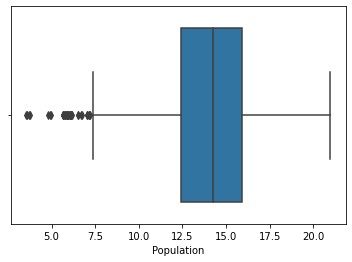

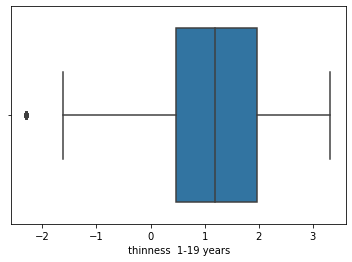

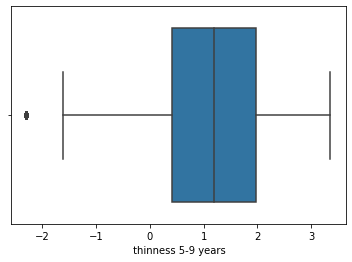

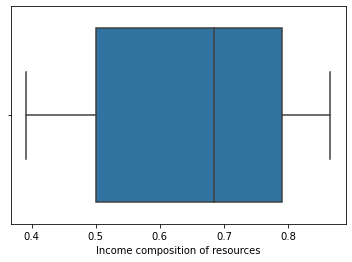

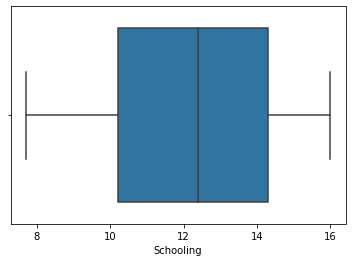

In [21]:
for col in life_expect_nan:
    sns.boxplot((life_expectancy[col]))
    plt.show()

multivariate exploration techniques

In [22]:
life_expectancy.describe(include=["O"])


,Country,Status
count,2938,2938
unique,193,2
top,Philippines,Developing
freq,16,2426


In [23]:
life_expectancy.describe(include= 'all')

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938,2938.000000,2938,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,...,2919.000000,2938.000000,2919.000000,2938.000000,2938.000000,2938.000000,2904.000000,2904.000000,2938.000000,2938.000000
unique,193,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Philippines,NaN,Developing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,16,NaN,2426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2007.518720,NaN,69.428557,156.604833,13.948945,4.602861,369.795323,4.393714e+00,586.539823,...,4.305176,1.683981,4.299999,-1.221949,7.593626,14.060290,1.129200,1.117278,0.651730,12.175837
std,NaN,4.613841,NaN,8.196579,100.978930,19.797841,0.000000,588.210378,8.883296e-16,1151.099202,...,0.618553,0.474496,0.623757,1.613377,1.814503,2.553151,1.043545,1.076890,0.159155,2.639981
min,NaN,2000.000000,NaN,54.800000,19.000000,0.000000,4.602861,0.000000,4.393714e+00,0.000000,...,1.098612,-0.994252,0.693147,-2.302585,0.519597,3.526361,-2.302585,-2.302585,0.391000,7.700000
25%,NaN,2004.000000,NaN,63.200000,74.000000,0.000000,4.602861,4.685343,4.393714e+00,0.000000,...,4.356709,1.461517,4.356709,-2.302585,6.316476,12.443518,0.470004,0.405465,0.500000,10.200000
50%,NaN,2008.000000,NaN,72.100000,144.000000,3.000000,4.602861,64.912906,4.393714e+00,17.000000,...,4.532599,1.750937,4.532599,-2.302585,7.692880,14.270603,1.193922,1.193922,0.684000,12.400000
75%,NaN,2012.000000,NaN,75.700000,228.000000,22.000000,4.602861,441.534144,4.393714e+00,360.250000,...,4.574711,2.006871,4.574711,-0.223144,8.879525,15.921562,1.974081,1.974081,0.791107,14.300000


In [24]:
plt.figure(figsize=(18,15))


<Figure size 1296x1080 with 0 Axes>

<Figure size 1296x1080 with 0 Axes>

    histograms of the original data
plt.subplot(3, 3, 1)
plt.hist(life_expectancy["Schooling"])
plt.title("histogram of schooling")

plt.subplot(3, 3, 2)
plt.hist(life_expectancy["Income composition of resources"])
plt.title("histogram of Income composition of resources")

plt.subplot(3, 3, 3)
plt.hist(life_expectancy["percentage expenditure"])
plt.title("histogram of percentage expenditure")

     histograms of the winsorized data
plt.subplot(3, 3, 4)
plt.hist(life_expectancy["winsorized_schooling"])
plt.title("histogram of Schooling (winsorized)")

plt.subplot(3, 3, 5)
plt.hist(life_expectancy["winsorized_Income composition of resources"])
plt.title("histogram of Income composition of resources (winsorized)")

plt.subplot(3, 3, 6)
plt.hist(life_expectancy["winsorized_percentage expenditure"])
plt.title("histogram of percentage expenditure (winsorized)")

     histograms of the log transformed data
plt.subplot(3, 3, 7)
plt.hist(np.log(life_expectancy["Schooling"]))
plt.title("histogram of Schooling(log transformed)")

plt.subplot(3, 3, 8)
plt.hist(np.log(life_expectancy["Income composition of resources"]))
plt.title("histogram of Income composition of resources (log transformed)")

plt.subplot(3, 3, 9)
plt.hist(np.log(life_expectancy["percentage expenditure"]))
plt.title("histogram of percentage expenditure (log transformed)")

plt.show()

In [25]:

life_expectancy.corr()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000e+00,1.440046e-01,-4.598586e-02,-4.806660e-02,-2.385282e-14,2.399085e-02,-2.366063e-14,-1.570783e-01,1.073976e-01,-5.382744e-02,6.581186e-02,5.457142e-02,1.087231e-01,-9.523939e-02,1.310108e-01,3.046177e-02,-3.674682e-02,-3.757092e-02,1.684175e-01,1.703411e-01
Life expectancy,1.440046e-01,1.000000e+00,-6.691745e-01,-5.741137e-01,-6.246496e-14,4.812838e-01,-6.287494e-14,-3.017501e-01,5.937242e-01,-6.014080e-01,3.291599e-01,1.701058e-01,3.449967e-01,-8.116069e-01,5.373153e-01,-6.407697e-02,-5.409923e-01,-5.460518e-01,8.105655e-01,7.546476e-01
Adult Mortality,-4.598586e-02,-6.691745e-01,1.000000e+00,3.669794e-01,5.734074e-16,-3.399510e-01,8.474218e-16,1.641777e-01,-3.891192e-01,3.816260e-01,-2.023466e-01,-9.915935e-02,-2.053756e-01,5.649159e-01,-3.434980e-01,4.972804e-02,3.527608e-01,3.646286e-01,-5.398219e-01,-4.801259e-01
infant deaths,-4.806660e-02,-5.741137e-01,3.669794e-01,1.000000e+00,-4.105195e-16,-3.232340e-01,3.354283e-16,5.613305e-01,-4.497591e-01,9.938027e-01,-2.544790e-01,-1.068770e-01,-2.311811e-01,4.055832e-01,-3.558060e-01,3.068601e-01,3.975989e-01,4.145548e-01,-4.770350e-01,-5.055601e-01
Alcohol,-2.385282e-14,-6.246496e-14,5.734074e-16,-4.105195e-16,1.000000e+00,-2.448583e-15,1.000000e+00,-1.900281e-18,2.005384e-14,-4.125892e-16,8.758887e-14,-1.321005e-14,9.463887e-14,5.555435e-15,-3.216451e-15,-1.313463e-14,2.866881e-15,-6.375972e-16,-3.059378e-16,1.782912e-14
percentage expenditure,2.399085e-02,4.812838e-01,-3.399510e-01,-3.232340e-01,-2.448583e-15,1.000000e+00,-1.985093e-15,-1.576103e-01,3.224795e-01,-3.199524e-01,1.437233e-01,8.773873e-02,1.297415e-01,-2.891285e-01,6.595060e-01,-1.350842e-02,-3.679776e-01,-3.764328e-01,5.200416e-01,5.007113e-01
Hepatitis B,-2.366063e-14,-6.287494e-14,8.474218e-16,3.354283e-16,1.000000e+00,-1.985093e-15,1.000000e+00,-3.688097e-16,1.997432e-14,1.968776e-16,8.753892e-14,-1.319782e-14,9.466368e-14,4.850174e-15,-3.218763e-15,-1.310144e-14,2.675421e-15,-4.747937e-16,-1.638028e-16,1.796829e-14
Measles,-1.570783e-01,-3.017501e-01,1.641777e-01,5.613305e-01,-1.900281e-18,-1.576103e-01,-3.688097e-16,1.000000e+00,-3.110820e-01,5.635752e-01,-1.866909e-01,-1.338511e-01,-1.656443e-01,1.812574e-01,-1.929441e-01,1.935102e-01,2.574805e-01,2.637591e-01,-2.232697e-01,-2.706395e-01
BMI,1.073976e-01,5.937242e-01,-3.891192e-01,-4.497591e-01,2.005384e-14,3.224795e-01,1.997432e-14,-3.110820e-01,1.000000e+00,-4.696491e-01,2.128775e-01,1.918136e-01,2.160017e-01,-4.944896e-01,4.115310e-01,-1.934093e-02,-5.556828e-01,-5.617679e-01,5.613797e-01,5.456255e-01
under-five deaths,-5.382744e-02,-6.014080e-01,3.816260e-01,9.938027e-01,-4.125892e-16,-3.199524e-01,1.968776e-16,5.635752e-01,-4.696491e-01,1.000000e+00,-2.681850e-01,-1.102176e-01,-2.467057e-01,4.366392e-01,-3.663658e-01,2.938644e-01,3.993997e-01,4.136812e-01,-4.961724e-01,-5.208454e-01


Feature Engineering

In [26]:
import numpy as np
import pandas as pd

from scipy import stats
import statsmodels.api as sm
from sqlalchemy import create_engine

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'lifeexpectancy'
table_name = 'lifeexpectancy'
conn_str = f"postgresql://{postgres_user}:{postgres_pw}@{postgres_host}:{postgres_port}/{postgres_db}"
        
query = """
SELECT *
FROM lifeexpectancy
"""

#did this to start with the original data = NAs

In [27]:
def show_top_missing(df, n=5, rate=True):
    life_expectancy = df.isna()
    
    # Aggregate the df:
    # * if rate is true, then calculate what percent of values are nan
    # * if rate is false, then calculate the count of nans
    if rate:
        missing_stats = life_expectancy.mean()
    else:
        missing_stats = life_expectancy.sum()

    top_missing = missing_stats.sort_values(ascending=False)
    print(top_missing.head(n))


In [28]:
show_top_missing(life_expectancy)
life_expectancy.head()

 thinness 5-9 years      0.011572
 thinness  1-19 years    0.011572
Diphtheria               0.006467
Polio                    0.006467
Schooling                0.000000
dtype: float64


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,58,4.602861,71.279624,4.393714,1154,...,1.791759,2.099244,4.174387,-2.302585,6.370345,17.334091,2.844909,2.850707,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,58,4.602861,73.523582,4.393714,492,...,4.060443,2.101692,4.127134,-2.302585,6.417870,12.699494,2.862201,2.862201,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,58,4.602861,73.219243,4.393714,430,...,4.127134,2.095561,4.158883,-2.302585,6.448486,17.272826,2.873565,2.873565,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,58,4.602861,78.184215,4.393714,2787,...,4.204693,2.142416,4.204693,-2.302585,6.507217,15.123021,2.884801,2.890372,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,58,4.602861,7.097109,4.393714,3013,...,4.219508,2.063058,4.219508,-2.302585,4.151626,14.906964,2.901422,2.901422,0.454,9.5


In [29]:
life_expectancy.corr().tail(1)

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Schooling,0.170341,0.754648,-0.480126,-0.50556,1.782912e-14,0.500711,1.796829e-14,-0.270639,0.545625,-0.520845,0.286706,0.179771,0.281415,-0.551996,0.605941,-0.015506,-0.508339,-0.507477,0.898644,1.0


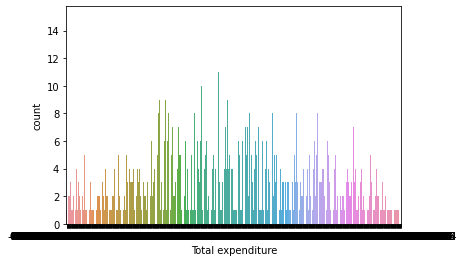

In [30]:
sns.countplot(life_expectancy["Total expenditure"])
plt.show()

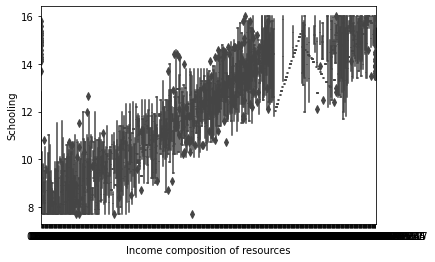

In [31]:
sns.boxplot("Income composition of resources", "Schooling", data=life_expectancy)
plt.show()

clearly see that schooling affects the income growth

!pip3 install -U scikit-learn scipy matplotlib


In [58]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [100]:
X = life_expectancy.drop('Country', axis=1)

# Store what you want to predict () in y
y = life_expectancy["Life expectancy "]

In [ ]:

print("Feature variances before scaling:")
print(X.var().sort_values(ascending=False).head())

scaler = StandardScaler()

    'learn' from the data
scaler.fit(X)

    apply what the scaler learned
scaled_X = scaler.transform(X)

scaled_df = pd.DataFrame(scaled_X, columns=X.columns)

print("\n\nFeature variances before scaling:")
print(scaled_df.var().sort_values(ascending=False).head())

In [ ]:
pca = PCA()

    'learn' from the data
pca.fit(scaled_X)

    apply what the pca object learned
pca_X = pca.transform(scaled_X)

     What attribute holds the variance explained?
plt.plot(pca.explained_variance_ratio_, marker="o")
plt.title("Variance explained by each component")
plt.show()

sns.heatmap(pd.DataFrame(pca_X).corr(), vmin=-1, vmax=1)
plt.title("Correlation between components")
plt.show()

I don't know what's wrong with it, but will work on it more. This is crazy, i'm sitting on this challenge for more than 20 hours, hopefully it will get better and quicker over time. 